In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import xgboost as xgb

## Reading the data

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Person ID,Injury Severity,Circumstance,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location,Fault
0,MP060D,10196,Montgomery County Police,Injury Crash,06/05/2017 04:27:00 PM,Maryland (State),OLD HUNDRED RD,County,THURSTON RD,12305 SHOREFIELD RD,NaN,NaN,SINGLE VEHICLE,CLEAR,WET,DAYLIGHT,NO CONTROLS,NONE DETECTED,NaN,466D8B-AC8C7,SUSPECTED MINOR INJURY,"N/A, WET",MD,7C2FEC-727F4,DESTROYED,TWELVE OCLOCK,TWELVE OCLOCK,PICKUP TRUCK,MOVING CONSTANT SPEED,South,Unknown,40,No,No,2005,GMC,TRUCK,NO MISUSE,39.263378,-77.344203,3.6383 7.4233,1
1,MP000X,20080,Montgomery County Police,Injury Crash,02/22/2020 10:00:00 AM,County,JANET RD,County,FLACK ST,NaN,NaN,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,STOP SIGN,NONE DETECTED,NaN,4028E4-C5384,NO APPARENT INJURY,"BACKUP DUE TO REGULAR CONGESTION, SLEET, HAIL,...",MD,67644F-64EF8,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,ACCELERATING,South,South,25,No,Yes,2018,FORD,FIESTA,NO MISUSE,39.068913,-77.063227,3.0862 7.324,1
2,MP070N,10103,Montgomery County Police,Property Damage Crash,06/11/2017 08:21:00 AM,Maryland (State),COLESVILLE RD,Maryland (State),STRUC #15082,NaN,NaN,NaN,SAME DIRECTION RIGHT TURN,CLEAR,DRY,UNKNOWN,OTHER,NaN,NaN,889DBD-D57FF,NO APPARENT INJURY,NaN,DC,30F7A9-92C98,SUPERFICIAL,SIX OCLOCK,SIX OCLOCK,TRANSIT BUS,PARKING,West,West,35,No,No,2016,NEW FLYER,TBU,NO MISUSE,38.993578,-77.032718,3.9583 7.3783,0
3,MP130Y,10208,Montgomery County Police,Injury Crash,05/10/2019 07:30:00 AM,County,PARKLAND DR,County,FRANKFORT DR,NaN,NaN,NaN,OTHER,CLOUDY,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NaN,77155D-96AA7,POSSIBLE INJURY,NaN,MD,0F0C58-8E98F,FUNCTIONAL,TWELVE OCLOCK,TWO OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,South,South,25,No,No,2001,CHEV,SUBURBAN,OTHER,39.083480,-77.086933,"3.84,-70633",1
4,MP770Y,1091,Montgomery County Police,Injury Crash,08/02/2016 05:00:00 PM,Maryland (State),OLD GEORGETOWN RD,County,MCKINLEY ST,NaN,NaN,NaN,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,MEDICATION PRESENT,5E180B-42B0C,SUSPECTED MINOR INJURY,NaN,MD,4397C0-AEE83,DISABLING,SIX OCLOCK,SIX OCLOCK,PASSENGER CAR,SLOWING OR STOPPING,South,South,40,No,No,2013,KIA,RIO,NO MISUSE,38.996942,-77.109168,3.9917 7.0183,0


In [ ]:
test_df = pd.read_csv('test.csv')
test_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Person ID,Injury Severity,Circumstance,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,0,MP810M,NaN,MONTGOMERY,Property Damage Crash,12/16/2015 05:42:00 PM,County,WHITTIER BLVD,Maryland (State),WILSON LA,NaN,NaN,NaN,OTHER,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,ALCOHOL CONTRIBUTED,NaN,F05A35-C3C98,NO APPARENT INJURY,NaN,MD,DA635F-C3055,FUNCTIONAL,ELEVEN OCLOCK,ELEVEN OCLOCK,PASSENGER CAR,MAKING RIGHT TURN,North,North,25,No,No,2004,LEXUS,RX330,NO MISUSE,38.988440,-77.127668,"3.84,-71763"
1,1,MP2001,NaN,Montgomery County Police,Property Damage Crash,05/01/2016 07:25:00 PM,County,RAILROAD ST,Municipality,E DIAMOND AVE,NaN,GAITHERSBURG,NaN,SAME DIR REAR END,RAINING,WET,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,79C1D8-6A412,NO APPARENT INJURY,"RAIN, SNOW, WET",MD,DBC8E9-FC340,SUPERFICIAL,SIX OCLOCK,SIX OCLOCK,PASSENGER CAR,STOPPED IN TRAFFIC LANE,South,West,25,No,No,2001,MITSUBISHI,MIRAGE,NO MISUSE,39.094075,-77.205783,3.905 7.0733
2,2,MP6404,10125,Montgomery County Police,Property Damage Crash,03/16/2018 02:30:00 PM,Maryland (State),GEORGIA AVE,County,ARCOLA AVE,NaN,NaN,NaN,SAME DIRECTION SIDESWIPE,NaN,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,30EC44-418A7,NO APPARENT INJURY,NaN,MD,32DA16-845E9,NO DAMAGE,TWO OCLOCK,TWO OCLOCK,AMBULANCE/EMERGENCY,MOVING CONSTANT SPEED,North,North,35,No,No,2016,FRIEGHTLINER,AMBULANCE,NO MISUSE,39.047180,-77.052688,"3.41,-70283"
3,3,MP0405,10270,Montgomery County Police,Property Damage Crash,05/25/2018 05:00:00 PM,NaN,NaN,NaN,NaN,"19600 FREDERICK RD, PAWN SHOP PARKING LOT",NaN,NaN,SAME DIRECTION SIDESWIPE,CLEAR,NaN,DAYLIGHT,NO CONTROLS,NaN,NaN,C7FA23-4267E,NO APPARENT INJURY,NaN,MD,4DC569-AB8EA,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,ACCELERATING,West,West,25,No,No,2004,FORD,CN,NaN,39.178007,-77.238475,3.7067 7.345
4,4,MP090D,10374,Montgomery County Police,Property Damage Crash,09/23/2017 05:40:00 PM,Interstate (State),EISENHOWER MEMORIAL HWY,Maryland (State),MONTROSE RD,NaN,NaN,NaN,OTHER,CLEAR,DRY,DAYLIGHT,NO CONTROLS,UNKNOWN,NaN,B6023B-A34FF,NO APPARENT INJURY,NaN,NaN,B3BD7B-487E4,SUPERFICIAL,NINE OCLOCK,NINE OCLOCK,"MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4...",CHANGING LANES,North,North,55,No,No,2008,UTIL,TL,UNKNOWN,39.056134,-77.154043,3.5143 7.5022


In [ ]:
ID = test_df['Id']
test_df['Id'].value_counts()
# test_df.drop('Id', axis = 1, inplace = True)

2047     1
53903    1
8849     1
14994    1
12947    1
        ..
32101    1
25958    1
28007    1
5480     1
0        1
Name: Id, Length: 77235, dtype: int64

## Pre-processing the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Report Number                   51490 non-null  object 
 1   Local Case Number               45037 non-null  object 
 2   Agency Name                     51490 non-null  object 
 3   ACRS Report Type                51490 non-null  object 
 4   Crash Date/Time                 51490 non-null  object 
 5   Route Type                      46522 non-null  object 
 6   Road Name                       46988 non-null  object 
 7   Cross-Street Type               46471 non-null  object 
 8   Cross-Street Name               46968 non-null  object 
 9   Off-Road Description            6950 non-null   object 
 10  Municipality                    7567 non-null   object 
 11  Related Non-Motorist            3648 non-null   object 
 12  Collision Type                  

In [ ]:
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'])
df['year'] = df['Crash Date/Time'].dt.year
df['month'] = df['Crash Date/Time'].dt.month
df['date'] = df['Crash Date/Time'].dt.day
df['day'] = df['Crash Date/Time'].dt.dayofweek
df['hour'] = df['Crash Date/Time'].dt.hour
df.drop('Crash Date/Time', axis = 1, inplace = True)

In [ ]:
test_df['Crash Date/Time'] = pd.to_datetime(test_df['Crash Date/Time'])
test_df['year'] = test_df['Crash Date/Time'].dt.year
test_df['month'] = test_df['Crash Date/Time'].dt.month
test_df['date'] = test_df['Crash Date/Time'].dt.day
test_df['day'] = test_df['Crash Date/Time'].dt.dayofweek
test_df['hour'] = test_df['Crash Date/Time'].dt.hour
test_df.drop('Crash Date/Time', axis = 1, inplace = True)

In [ ]:
test_df.isnull().sum()

Id                                    0
Report Number                         0
Local Case Number                 10073
Agency Name                           0
ACRS Report Type                      0
Route Type                         7467
Road Name                          7069
Cross-Street Type                  7480
Cross-Street Name                  7071
Off-Road Description              70166
Municipality                      68737
Related Non-Motorist              74987
Collision Type                      245
Weather                            5996
Surface Condition                  9053
Light                               620
Traffic Control                   12050
Driver Substance Abuse            14083
Non-Motorist Substance Abuse      75458
Person ID                             0
Injury Severity                       0
Circumstance                      62690
Drivers License State              3920
Vehicle ID                            0
Vehicle Damage Extent               136


In [ ]:
unique, counts = np.unique(df['Report Number'], return_counts = True)

In [ ]:
counts.sum()

51490

In [ ]:
df.drop('Report Number', axis = 1, inplace=True)
df.shape

(51490, 45)

In [ ]:
test_df.drop('Report Number', axis = 1, inplace=True)
test_df.shape

(77235, 45)

In [ ]:
df.drop('Local Case Number', axis = 1, inplace=True)

In [ ]:
df.shape

(51490, 44)

In [ ]:
test_df.drop('Local Case Number', axis = 1, inplace=True)
test_df.shape

(77235, 44)

In [ ]:
df['Route Type'].value_counts()

Maryland (State)        22482
County                  16059
Municipality             2840
US (State)               2291
Interstate (State)       1145
Other Public Roadway      489
Ramp                      398
Government                390
Service Road              218
Unknown                   210
Name: Route Type, dtype: int64

In [ ]:
df['Route Type'] = df['Route Type'].fillna(df['Route Type'].mode()[0])
df['Route Type'].describe()

count                51490
unique                  10
top       Maryland (State)
freq                 27450
Name: Route Type, dtype: object

In [ ]:
test_df['Route Type'] = test_df['Route Type'].fillna(test_df['Route Type'].mode()[0])

In [ ]:
df['Road Name'] = df['Road Name'].fillna(df['Road Name'].mode()[0])
df['Road Name'].describe()

count           51490
unique           2226
top       GEORGIA AVE
freq             7624
Name: Road Name, dtype: object

In [ ]:
test_df['Road Name'] = test_df['Road Name'].fillna(test_df['Road Name'].mode()[0])

In [ ]:
df['Cross-Street Type'] = df['Cross-Street Type'].fillna(df['Cross-Street Type'].mode()[0])
df['Cross-Street Type'].describe()

count      51490
unique        10
top       County
freq       29713
Name: Cross-Street Type, dtype: object

In [ ]:
test_df['Cross-Street Type'] = test_df['Cross-Street Type'].fillna(test_df['Cross-Street Type'].mode()[0])

In [ ]:
df['Cross-Street Name'] = df['Cross-Street Name'].fillna(df['Cross-Street Name'].mode()[0])
df['Cross-Street Name'].describe()

count           51490
unique           4525
top       GEORGIA AVE
freq             5138
Name: Cross-Street Name, dtype: object

In [ ]:
test_df['Cross-Street Name'] = test_df['Cross-Street Name'].fillna(test_df['Cross-Street Name'].mode()[0])

In [ ]:
df.drop('Off-Road Description', axis = 1, inplace = True)
df.shape

(51490, 43)

In [ ]:
test_df.drop('Off-Road Description', axis = 1, inplace = True)

In [ ]:
df['Municipality'] = df['Municipality'].fillna(df['Municipality'].mode()[0])
df['Municipality'].describe()

count         51490
unique           20
top       ROCKVILLE
freq          46629
Name: Municipality, dtype: object

In [ ]:
test_df['Municipality'] = test_df['Municipality'].fillna(test_df['Municipality'].mode()[0]) 

In [ ]:
df.drop('Related Non-Motorist', axis = 1, inplace = True)

In [ ]:
test_df.drop('Related Non-Motorist', axis = 1, inplace = True)

In [ ]:
df.shape

(51490, 42)

In [ ]:
df['Collision Type'] = df['Collision Type'].fillna(df['Collision Type'].mode()[0])
df['Collision Type'].describe()

count                 51490
unique                   18
top       SAME DIR REAR END
freq                  17030
Name: Collision Type, dtype: object

In [ ]:
test_df['Collision Type'] = test_df['Collision Type'].fillna(test_df['Collision Type'].mode()[0])

In [ ]:
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0]) 
df['Weather'].describe()

count     51490
unique       12
top       CLEAR
freq      37143
Name: Weather, dtype: object

In [ ]:
test_df['Weather'] = test_df['Weather'].fillna(test_df['Weather'].mode()[0])

In [ ]:
df['Surface Condition'] = df['Surface Condition'].fillna(df['Surface Condition'].mode()[0])
df['Surface Condition'].describe()

count     51490
unique       11
top         DRY
freq      40076
Name: Surface Condition, dtype: object

In [ ]:
test_df['Surface Condition'] = test_df['Surface Condition'].fillna(test_df['Surface Condition'].mode()[0])

In [ ]:
df['Light'].value_counts()

DAYLIGHT                    33617
DARK LIGHTS ON              11224
DARK NO LIGHTS               1716
DUSK                         1425
DAWN                         1222
DARK -- UNKNOWN LIGHTING      727
UNKNOWN                       480
OTHER                         375
Name: Light, dtype: int64

In [ ]:
temp = df['Light'].loc[(df['hour'] >= 6) & (df['hour'] < 17)]
temp = temp.fillna('DAYLIGHT')
df.update(temp)

In [ ]:
temp = test_df['Light'].loc[(test_df['hour'] >= 6) & (test_df['hour'] < 17)]
temp = temp.fillna('DAYLIGHT')
test_df.update(temp)

In [ ]:
temp = df['Light'].loc[(df['hour'] >= 17) & (df['hour'] < 18)]
temp = temp.fillna('DAYLIGHT')
df.update(temp)

In [ ]:
temp = test_df['Light'].loc[(test_df['hour'] >= 17) & (test_df['hour'] < 18)]
temp = temp.fillna('DAYLIGHT')
test_df.update(temp)

In [ ]:
temp = df['Light'].loc[(df['hour'] >= 18) & (df['hour'] <= 23)]
temp = temp.fillna('DARK LIGHTS ON')
df.update(temp)

In [ ]:
temp = test_df['Light'].loc[(test_df['hour'] >= 18) & (test_df['hour'] <= 23)]
temp = temp.fillna('DARK LIGHTS ON')
test_df.update(temp)

In [ ]:
temp = df['Light'].loc[(df['hour'] >= 0) & (df['hour'] < 5)]
temp = temp.fillna('DARK LIGHTS ON')
df.update(temp)

In [ ]:
temp = test_df['Light'].loc[(test_df['hour'] >= 0) & (test_df['hour'] < 5)]
temp = temp.fillna('DARK LIGHTS ON')
test_df.update(temp)

In [ ]:
temp = df['Light'].loc[(df['hour'] >= 5) & (df['hour'] < 6)]
temp = temp.fillna('DARK LIGHTS ON')
df.update(temp)

In [ ]:
temp = test_df['Light'].loc[(test_df['hour'] >= 5) & (test_df['hour'] < 6)]
temp = temp.fillna('DARK LIGHTS ON')
test_df.update(temp)

In [ ]:
df['Light'].isnull().sum()

0

In [ ]:
test_df['Light'].isnull().sum()

0

In [ ]:
df['Light'].value_counts()

DAYLIGHT                    34114
DARK LIGHTS ON              11431
DARK NO LIGHTS               1716
DUSK                         1425
DAWN                         1222
DARK -- UNKNOWN LIGHTING      727
UNKNOWN                       480
OTHER                         375
Name: Light, dtype: int64

In [ ]:
df['Traffic Control'] = df['Traffic Control'].fillna(df['Traffic Control'].mode()[0])
df['Traffic Control'].isnull().sum()

0

In [ ]:
test_df['Traffic Control'] = test_df['Traffic Control'].fillna(test_df['Traffic Control'].mode()[0])

In [ ]:
df['Driver Substance Abuse'] = df['Driver Substance Abuse'].fillna(df['Driver Substance Abuse'].mode()[0])

In [ ]:
test_df['Driver Substance Abuse'] = test_df['Driver Substance Abuse'].fillna(test_df['Driver Substance Abuse'].mode()[0])

In [ ]:
df.drop('Non-Motorist Substance Abuse', axis = 1, inplace = True)

In [ ]:
test_df.drop('Non-Motorist Substance Abuse', axis = 1, inplace = True)

In [ ]:
df.drop('Circumstance', axis = 1, inplace = True)

In [ ]:
test_df.drop('Circumstance', axis = 1, inplace = True)

In [ ]:
df['Drivers License State'] = df['Drivers License State'].fillna(df['Drivers License State'].mode()[0])
df['Drivers License State'].isnull().sum()

0

In [ ]:
test_df['Drivers License State'] = test_df['Drivers License State'].fillna(test_df['Drivers License State'].mode()[0])

In [ ]:
df['Vehicle Damage Extent'] = df['Vehicle Damage Extent'].fillna(df['Vehicle Damage Extent'].mode()[0])

In [ ]:
test_df['Vehicle Damage Extent'] = test_df['Vehicle Damage Extent'].fillna(test_df['Vehicle Damage Extent'].mode()[0])

In [ ]:
df['Vehicle First Impact Location'] = df['Vehicle First Impact Location'].fillna(df['Vehicle First Impact Location'].mode()[0])

In [ ]:
test_df['Vehicle First Impact Location'] = test_df['Vehicle First Impact Location'].fillna(test_df['Vehicle First Impact Location'].mode()[0])

In [ ]:
df['Vehicle Second Impact Location'] = df['Vehicle Second Impact Location'].fillna(df['Vehicle Second Impact Location'].mode()[0])

In [ ]:
test_df['Vehicle Second Impact Location'] = test_df['Vehicle Second Impact Location'].fillna(test_df['Vehicle Second Impact Location'].mode()[0])

In [ ]:
df['Vehicle Body Type'] = df['Vehicle Body Type'].fillna(df['Vehicle Body Type'].mode()[0])

In [ ]:
test_df['Vehicle Body Type'] = test_df['Vehicle Body Type'].fillna(test_df['Vehicle Body Type'].mode()[0])

In [ ]:
df['Vehicle Movement'] = df['Vehicle Movement'].fillna(df['Vehicle Movement'].mode()[0])

In [ ]:
test_df['Vehicle Movement'] = test_df['Vehicle Movement'].fillna(test_df['Vehicle Movement'].mode()[0])

In [ ]:
df['Vehicle Continuing Dir'] = df['Vehicle Continuing Dir'].fillna(df['Vehicle Continuing Dir'].mode()[0])

In [ ]:
test_df['Vehicle Continuing Dir'] = test_df['Vehicle Continuing Dir'].fillna(test_df['Vehicle Continuing Dir'].mode()[0])

In [ ]:
df['Vehicle Going Dir'] = df['Vehicle Going Dir'].fillna(df['Vehicle Going Dir'].mode()[0])

In [ ]:
test_df['Vehicle Going Dir'] = test_df['Vehicle Going Dir'].fillna(test_df['Vehicle Going Dir'].mode()[0])

In [ ]:
df['Vehicle Make'] = df['Vehicle Make'].fillna(df['Vehicle Make'].mode()[0])

In [ ]:
test_df['Vehicle Make'] = test_df['Vehicle Make'].fillna(test_df['Vehicle Make'].mode()[0])

In [ ]:
df['Vehicle Model'] = df['Vehicle Model'].fillna(df['Vehicle Model'].mode()[0])

In [ ]:
test_df['Vehicle Model'] = test_df['Vehicle Model'].fillna(test_df['Vehicle Model'].mode()[0])

In [ ]:
df['Equipment Problems'] = df['Equipment Problems'].fillna(df['Equipment Problems'].mode()[0])

In [ ]:
test_df['Equipment Problems'] = test_df['Equipment Problems'].fillna(test_df['Equipment Problems'].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Agency Name                     51490 non-null  object 
 1   ACRS Report Type                51490 non-null  object 
 2   Route Type                      51490 non-null  object 
 3   Road Name                       51490 non-null  object 
 4   Cross-Street Type               51490 non-null  object 
 5   Cross-Street Name               51490 non-null  object 
 6   Municipality                    51490 non-null  object 
 7   Collision Type                  51490 non-null  object 
 8   Weather                         51490 non-null  object 
 9   Surface Condition               51490 non-null  object 
 10  Light                           51490 non-null  object 
 11  Traffic Control                 51490 non-null  object 
 12  Driver Substance Abuse          

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77235 entries, 0 to 77234
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              77235 non-null  int64  
 1   Agency Name                     77235 non-null  object 
 2   ACRS Report Type                77235 non-null  object 
 3   Route Type                      77235 non-null  object 
 4   Road Name                       77235 non-null  object 
 5   Cross-Street Type               77235 non-null  object 
 6   Cross-Street Name               77235 non-null  object 
 7   Municipality                    77235 non-null  object 
 8   Collision Type                  77235 non-null  object 
 9   Weather                         77235 non-null  object 
 10  Surface Condition               77235 non-null  object 
 11  Light                           77235 non-null  object 
 12  Traffic Control                 

## Converting categorical data to numeric data

In [ ]:
col_ls = df._get_numeric_data().columns
categorical_ls = list(set(df.columns) - set(col_ls))

le = LabelEncoder()

for col_name in categorical_ls:
    df[col_name] = le.fit_transform(df[col_name])

In [ ]:
col_ls = test_df._get_numeric_data().columns
categorical_ls = list(set(test_df.columns) - set(col_ls))

le = LabelEncoder()

for col in categorical_ls:
  test_df[col] = test_df[col].astype(str)

# le.fit_transform(test_df['Route Type'])
for col_name in categorical_ls:
    test_df[col_name] = le.fit_transform(test_df[col_name])

In [ ]:
# vehicle year
# speed limit
# lat
# long
test_df['Vehicle Year'] = test_df['Vehicle Year'].fillna(test_df['Vehicle Year'].mode()[0])
test_df['Speed Limit'] = test_df['Speed Limit'].fillna(test_df['Speed Limit'].mode()[0])
test_df['Latitude'] = test_df['Latitude'].fillna(test_df['Latitude'].mode()[0])
test_df['Longitude'] = test_df['Longitude'].fillna(test_df['Longitude'].mode()[0])

In [ ]:
test_df.drop('Id',axis=1,inplace=True)

## Normalizing the columns

In [ ]:
mms = MinMaxScaler()
cols = df.columns
vals = df.values
vals_scaled = mms.fit_transform(vals)
df = pd.DataFrame(vals_scaled, columns=cols)

In [ ]:
cols = test_df.columns
vals = test_df.values
vals_scaled = mms.fit_transform(vals)
test_df = pd.DataFrame(vals_scaled, columns=cols)

In [ ]:
X,y = df.drop('Fault',axis=1), df['Fault']

## Ranking the features in our dataset

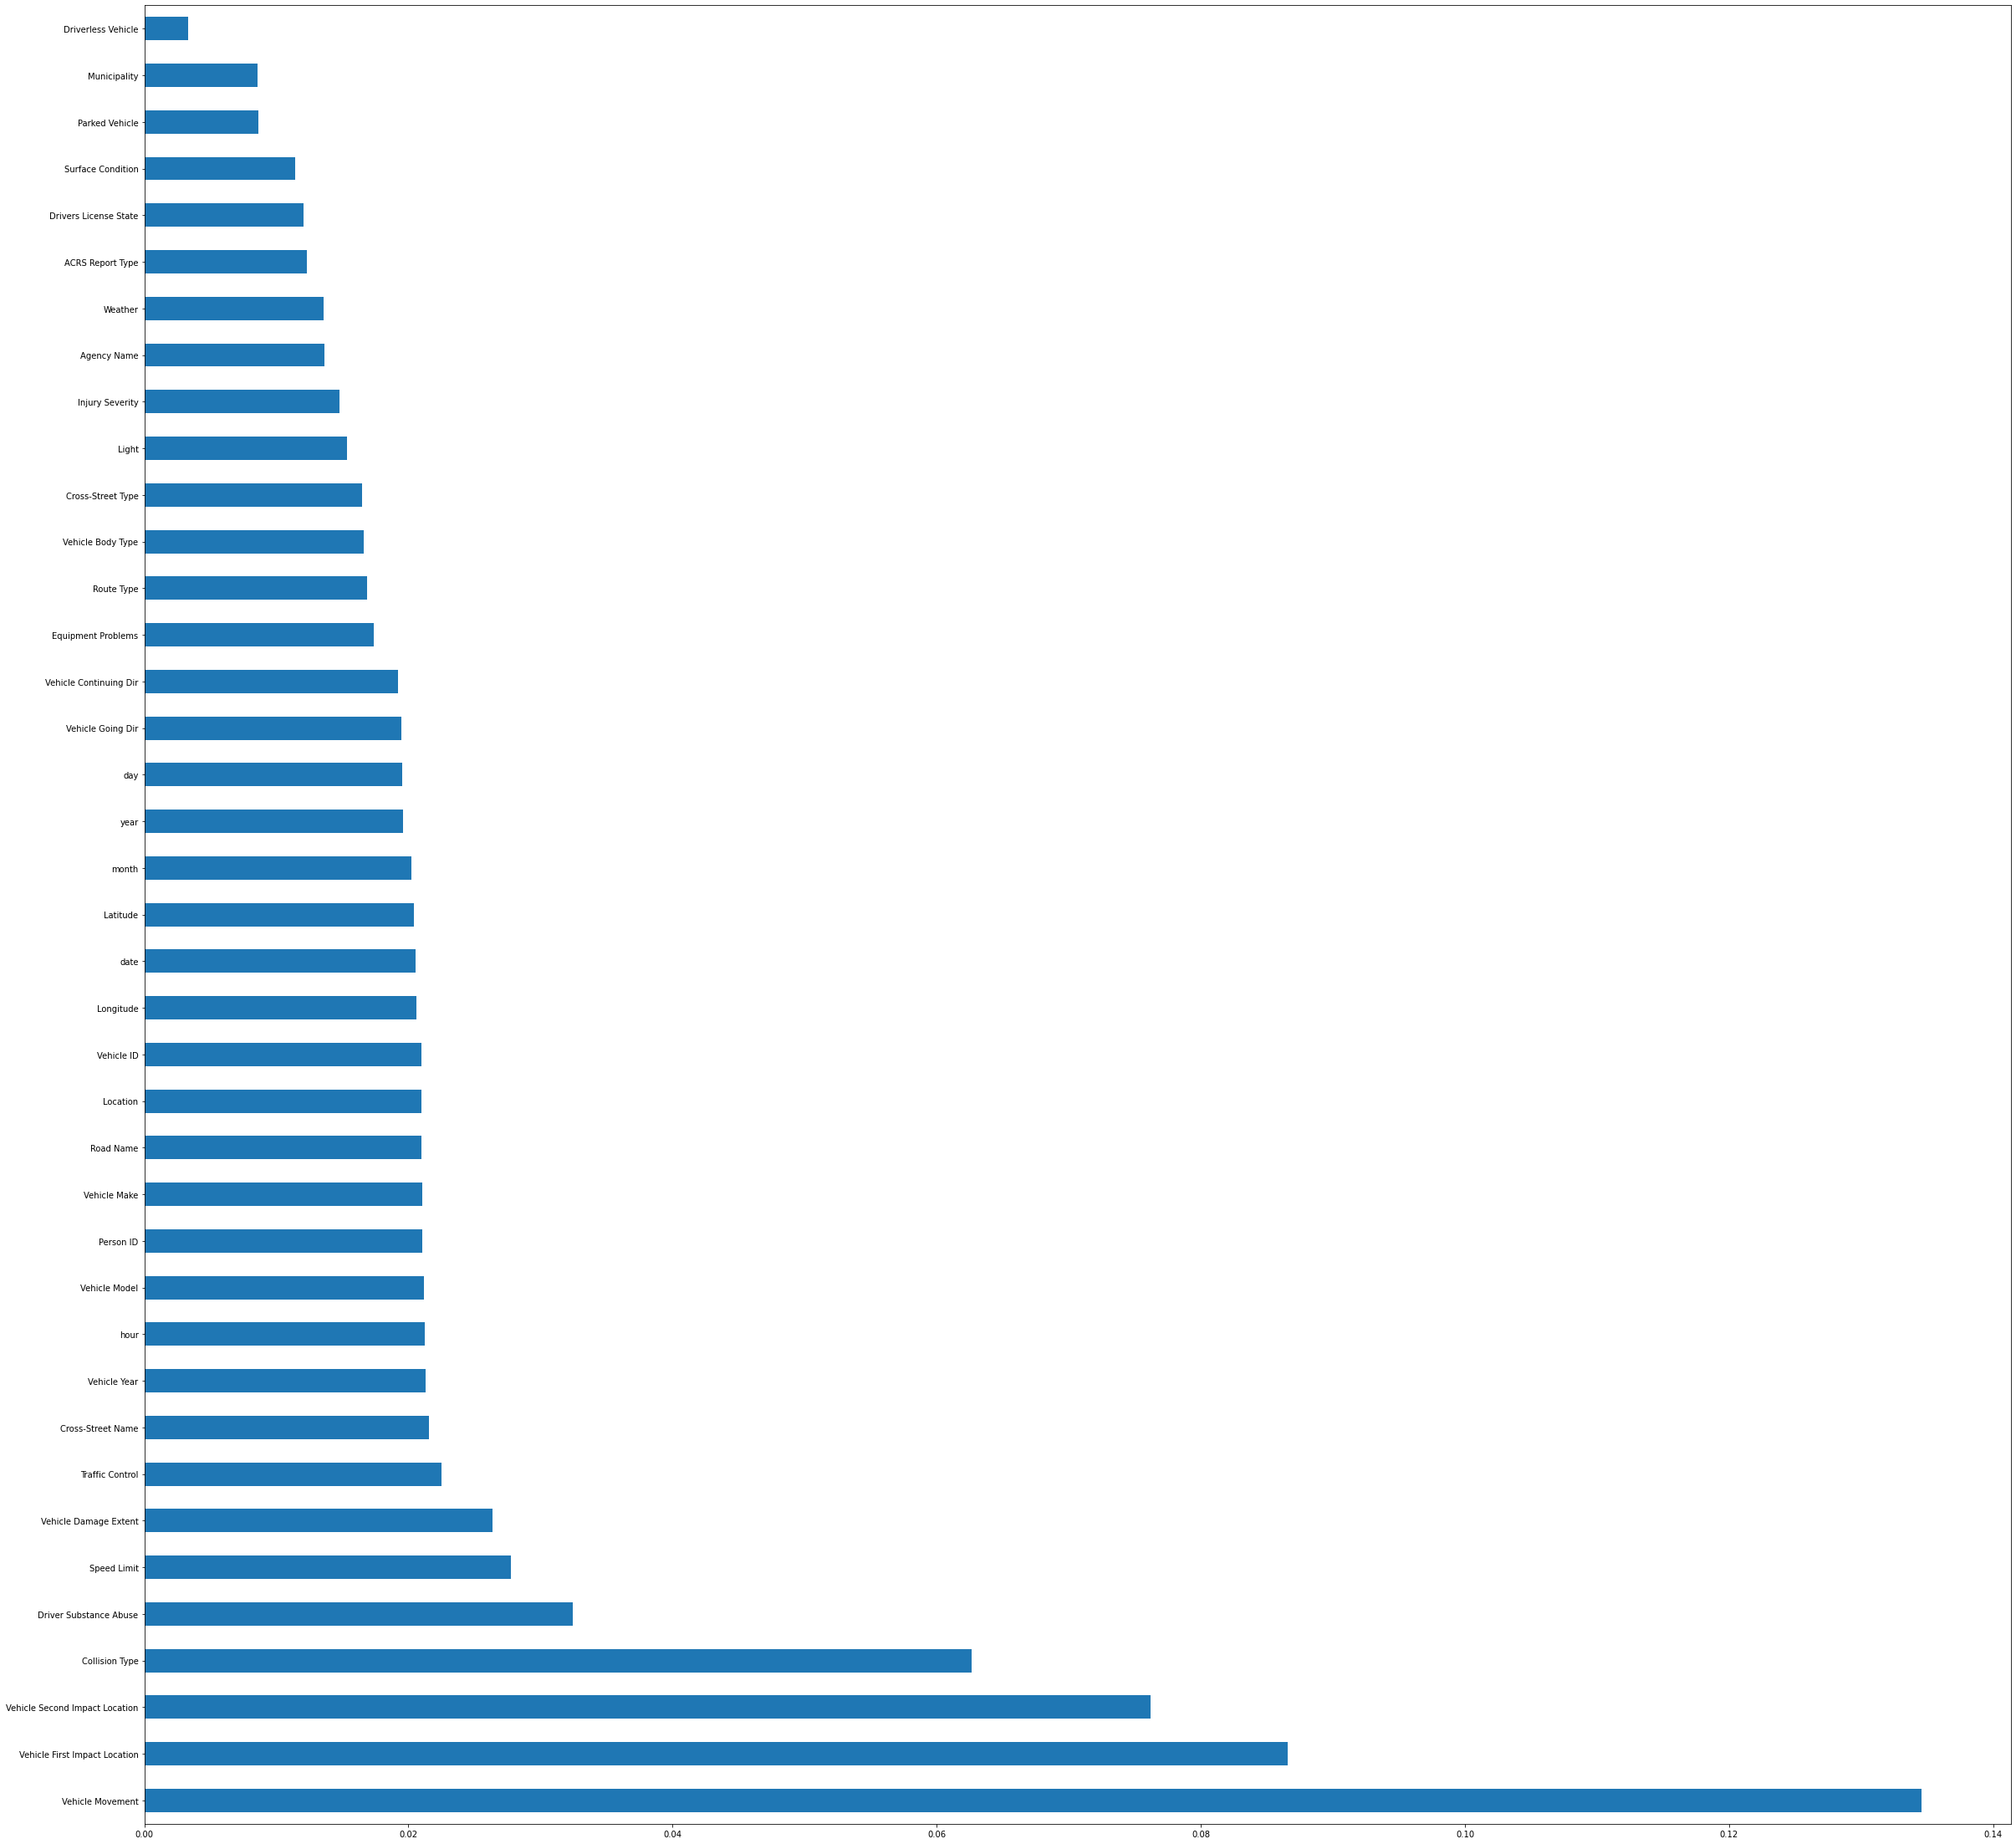

In [ ]:
feat_sel = ExtraTreesClassifier()
feat_sel.fit(X,y)
plt.figure(figsize=(40,40))
feat_imp = pd.Series(feat_sel.feature_importances_,index = X.columns)
feat_imp.nlargest(40).plot(kind='barh')

plt.show()
top_feats = feat_sel.feature_importances_

In [ ]:
# top_cols2 = corr_mat['Fault'].nlargest(16).index

In [ ]:
# top_cols2 = top_cols2.drop(labels='Fault')

In [ ]:
# df_new2 = df[top_cols2]
# test_df_new2 = test_df[top_cols2]

In [ ]:
test_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77235 entries, 0 to 77234
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Vehicle Movement                77235 non-null  float64
 1   Vehicle First Impact Location   77235 non-null  float64
 2   Vehicle Second Impact Location  77235 non-null  float64
 3   Collision Type                  77235 non-null  float64
 4   Driver Substance Abuse          77235 non-null  float64
 5   Speed Limit                     77235 non-null  float64
 6   Vehicle Damage Extent           77235 non-null  float64
 7   Traffic Control                 77235 non-null  float64
 8   Cross-Street Name               77235 non-null  float64
 9   Vehicle Year                    77235 non-null  float64
 10  hour                            77235 non-null  float64
 11  Vehicle Model                   77235 non-null  float64
 12  Person ID                       

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Vehicle Movement                51490 non-null  float64
 1   Vehicle First Impact Location   51490 non-null  float64
 2   Vehicle Second Impact Location  51490 non-null  float64
 3   Collision Type                  51490 non-null  float64
 4   Driver Substance Abuse          51490 non-null  float64
 5   Speed Limit                     51490 non-null  float64
 6   Vehicle Damage Extent           51490 non-null  float64
 7   Traffic Control                 51490 non-null  float64
 8   Cross-Street Name               51490 non-null  float64
 9   Vehicle Year                    51490 non-null  float64
 10  hour                            51490 non-null  float64
 11  Vehicle Model                   51490 non-null  float64
dtypes: float64(12)
memory usage: 4.7

In [ ]:
df.shape

(51490, 40)

## Training the model

In below cell we set 'k = 8' to select the top 8 features

In [ ]:
top_cols = feat_imp.nlargest(8).index

df_new = df[top_cols]
test_df_new = test_df[top_cols]

X_train, X_val, y_train, y_val = train_test_split(df_new,y,test_size=0.2)

In [ ]:
# X_train2, X_val2, y_train2, y_val2 = train_test_split(df_new2,y,test_size=0.3)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=150)
model_rf = model_rf.fit(X_train,y_train)
score = model_rf.score(X_val,y_val)
score

0.8413284132841329

In [ ]:
# _model_rf = RandomForestClassifier(n_estimators=20)
# _model_rf = _model_rf.fit(X_train2,y_train2)
# _score = _model_rf.score(X_val2,y_val2)
# _score

In [ ]:
model_rf2 = RandomForestClassifier(n_estimators=1000)
model_rf2 = model_rf2.fit(X_train,y_train)
score2 = model_rf2.score(X_val,y_val)
score2

0.8411342008156923

In [ ]:
# _model_rf2 = RandomForestClassifier(n_estimators=10)
# _model_rf2 = _model_rf2.fit(X_train2,y_train2)
# _score2 = _model_rf2.score(X_val2,y_val2)
# _score2

In [ ]:
model_rf3 = RandomForestClassifier()
model_rf3 = model_rf3.fit(X_train,y_train)
score5 = model_rf3.score(X_val,y_val)
score5

0.8403573509419304

In [ ]:
# _model_rf3 = RandomForestClassifier()
# _model_rf3 = _model_rf3.fit(X_train2,y_train2)
# _score5 = _model_rf3.score(X_val2,y_val2)
# _score5

In [ ]:
gb_clf = GradientBoostingClassifier()
gb_clf = gb_clf.fit(X_train,y_train)
score3 = gb_clf.score(X_val,y_val)
score3

0.8357933579335793

In [ ]:
# _gb_clf = GradientBoostingClassifier(n_estimators=10,learning_rate=0.05,max_features='sqrt',max_depth=14)
# _gb_clf = _gb_clf.fit(X_train2,y_train2)
# _score3 = _gb_clf.score(X_val2,y_val2)
# _score3

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,max_features='sqrt')
gb_clf2 = gb_clf2.fit(X_train,y_train)
score4 = gb_clf2.score(X_val,y_val)
score4

0.8383181200233055

In [ ]:
# _gb_clf2 = GradientBoostingClassifier(n_estimators=20,learning_rate=0.05,max_features='sqrt',max_depth=14)
# _gb_clf2 = _gb_clf2.fit(X_train2,y_train2)
# _score4 = _gb_clf2.score(X_val2,y_val2)
# _score4

In [ ]:
gb_clf3 = GradientBoostingClassifier(max_features='sqrt',max_depth=10)
gb_clf3 = gb_clf3.fit(X_train,y_train)
score6 = gb_clf3.score(X_val,y_val)
score6

0.8466692561662459

In [ ]:
# _gb_clf3 = GradientBoostingClassifier(max_features='sqrt',max_depth=10)
# _gb_clf3 = _gb_clf3.fit(X_train2,y_train2)
# _score6 = _gb_clf3.score(X_val2,y_val2)
# _score6

In [ ]:
gb_clf4 = GradientBoostingClassifier(max_features='sqrt',max_depth=10,n_estimators=220)
gb_clf4 = gb_clf4.fit(X_train,y_train)
score7 = gb_clf4.score(X_val,y_val)
score7

0.8417168382210138

In [ ]:
gb_clf5 = GradientBoostingClassifier(max_features='sqrt',max_depth=15,n_estimators=105)
gb_clf5 = gb_clf5.fit(X_train,y_train)
score8 = gb_clf5.score(X_val,y_val)
score8

0.8404544571761507

In [ ]:
xgb_model = xgb.XGBClassifier(learning_rate = 0.05,
                              max_depth = 10,
                              subsample = 0.6,
                              colsample_bytree = 0.6,
                              n_estimators = 225)

# xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
xgb_model.score(X_val,y_val)

0.8544377549038649

### Hyperparameter for best accuracy

- Number of features selected = 8 (This is not set in the XGBoostClassifier)
- learning_rate =  0.05
- max_depth = 8
- subsample = 0.6
- columnsample_bytree =  0.6
- n_estimators = 382

- Validation set accuracy score = 0.85667

In [ ]:
preds = xgb_model.predict(test_df_new).astype(int)

In [ ]:
test_preds = gb_clf2.predict(test_df_new).astype(int)
# test_preds2 = gb_clf4.predict(test_df_new).astype(int)

In [ ]:
submission = pd.DataFrame(
    {'Id': ID, 'Fault': test_preds},
    columns = ['Id','Fault'])
submission.to_csv('submission.csv', index = False)

In [ ]:
# submission = pd.DataFrame(
#     {'Id': ID, 'Fault': test_preds2},
#     columns = ['Id','Fault'])
# submission.to_csv('submission2.csv', index = False)

In [ ]:
submission = pd.DataFrame(
    {'Id': ID, 'Fault': preds},
    columns = ['Id','Fault'])
submission.to_csv('submission3.csv', index = False)

In [ ]:
test_df.shape

(77235, 39)

In [ ]:
preds.shape

(77235,)